In [10]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
from sklearn.preprocessing import RobustScaler
from colorama import Fore
from sklearn import metrics
import matplotlib.gridspec as gridspec
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error, r2_score, f1_score, accuracy_score, confusion_matrix
from sklearn.decomposition import PCA 
import math
warnings.filterwarnings('ignore')
from sklearn.preprocessing import StandardScaler


In [17]:
data = pd.read_csv('../clean_data/BigDS_train.csv')
X = data.drop(["Price"] , axis=1)
y = data["Price"]
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3, random_state=2525)
X_train = X_train.reset_index(drop=True)
X_val = X_val.reset_index(drop=True)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)


In [18]:
def models_score(x_train, x_val, y_train, y_val):    
    models = {
        "Linear": LinearRegression(),
         }
    evalutes = {}
    i = 0
    maes = []
    rmse = []
    mape = []
    names = []
    for name, model in models.items():
        model.fit(x_train, y_train)
        y_pred=model.predict(x_val) 
        names.append(name)
        maes.append(mean_absolute_error(y_val,y_pred))
        rmse.append(math.sqrt(mean_squared_error(y_val,y_pred)))
        mape.append(mean_absolute_percentage_error(y_val, y_pred))
    evalutes = {'Algorithms': names, 'MAE': maes, 'RMSE': rmse, "MAPE":mape}
    model_scores = pd.DataFrame(evalutes)
    return model_scores

In [19]:
score = models_score(X_train, X_val, y_train, y_val)
score

,Algorithms,MAE,RMSE,MAPE
0,Linear,1.363163e+06,1.703268e+06,0.545841


In [29]:
class Model:
    def __init__(self):
        self.model = None

    def predict(self, X_val):
        return self.model.predict(X_val)


class ModelLinearRegression(Model):
    def __init__(self, regular=False, weights=0):
        super().__init__()
        self.weights = weights
        self.regular = regular

    @staticmethod
    def cost_function(X, y, w):
        m = len(y)
        y_pred = X.dot(w)
        cost = np.sum((y_pred - y) ** 2) / (2 * m)
        return cost

    @staticmethod
    def gradient(X, y, w):
        m = len(y)
        y_pred = X.dot(w)
        dw = (1 / m) * np.dot(X.T, (y_pred - y))
        return dw

    def train(self, X, y, learning_rate=0.01, epochs=10000):
        if isinstance(y, (pd.Series, pd.DataFrame)):
            y = y.values.reshape(-1, 1)
        elif y.ndim == 1:
            y = y.reshape(-1, 1)

        X = np.c_[np.ones(X.shape[0]), X]  # Add bias column
        w = np.zeros((X.shape[1], 1))  # Initialize weights

        costs = []

        for i in range(epochs):
            dw = self.gradient(X, y, w)
            w = w - learning_rate * dw
            cost = self.cost_function(X, y, w)
            costs.append(cost)

            if i % 100 == 0:
                print(f"Iteration {i}: Cost = {cost}, w = {w.ravel()}")

        # Plot cost function
        plt.plot(range(epochs), costs)
        plt.xlabel("Epochs")
        plt.ylabel("Cost")
        plt.title("Cost Function during Training")
        plt.grid(True)
        plt.show()

        self.weights = w
        self.model = lambda X: np.c_[np.ones(X.shape[0]), X].dot(self.weights)  # Define model for prediction
        return w

    def evaluate(self, y_true, y_pred):
        mae = mean_absolute_error(y_true, y_pred)
        rmse = np.sqrt(mean_squared_error(y_true, y_pred))
        r2 = r2_score(y_true, y_pred)
        mape = mean_absolute_percentage_error(y_true, y_pred)
        return mae, rmse, mape, r2
    def predict(self, X):
            X = np.c_[np.ones(X.shape[0]), X]  # Add bias column
            y_pred = X.dot(self.weights)
            return y_pred
    def plot_yy(self, width, height, y_pred, y_val):
        f, ax = plt.subplots(1)
        f.set_figheight(height)
        f.set_figwidth(width)
        plt.scatter(y_val, y_pred, color='red')
        plt.plot(y_val, y_val)
        plt.grid()
        plt.xlabel('Actual price (Thousand VND)')
        plt.ylabel('Predicted price (Thousand VND)')
        plt.title('Scatter plot between actual y and predicted y')
        plt.show()


In [30]:
linear_reg = ModelLinearRegression()

Iteration 0: Cost = 7957834281972.993, w = [ 3.42981085e+04  5.54189298e+03 -1.43113330e+03  7.62452411e+03
 -7.08124049e+03 -1.99633070e+03 -2.16247502e+03  2.33292905e+03
 -4.63328397e+02 -2.59436897e+03 -4.32626460e+03  5.94655889e+03
 -1.62931634e+03 -8.34302314e+02  4.37002770e+01  2.70354321e+02
  3.14432616e+02  8.39547002e+02  2.17015853e+03  1.56820993e+03
 -1.63445349e+03  5.18734225e+02 -9.19699423e+02 -3.03113241e+03
  6.40748758e+02 -5.11064430e+02 -5.63565704e+02  7.22579079e+02
  4.33845932e+02 -9.42019548e+02 -6.20690587e+02 -2.36875066e+02
  1.48398949e+03 -1.35760855e+02 -4.12488251e+02 -2.38810147e+02
  1.37595268e+02  1.15253520e+03  1.28397774e+02 -1.99563380e+02
  1.73514037e+03 -1.60212821e+03  7.41311638e+02 -9.63932787e+02
 -2.04538692e+03  8.48339603e+01 -2.51000491e+01 -4.09289888e+02
  6.70508783e+02  2.52046380e+02 -5.55886085e+02  4.80815190e+02
 -7.20718066e+02  1.67491598e+03 -3.01009439e+01]
Iteration 100: Cost = 2421566457296.981, w = [ 2.18694337e+06 

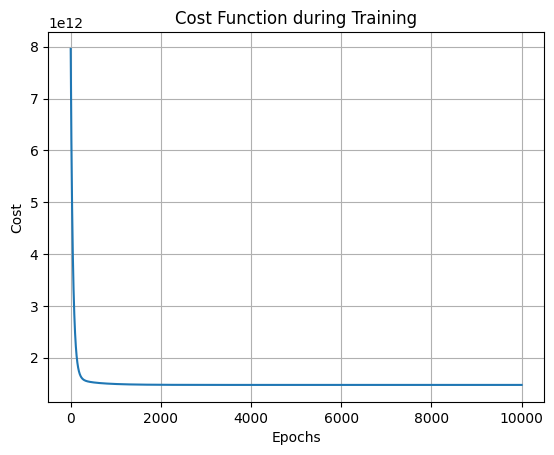

MAE: 1363163.2089324172
RMSE: 1703268.1234764173
MAPE: 0.5458416551265711
R2: 0.34626607506418194


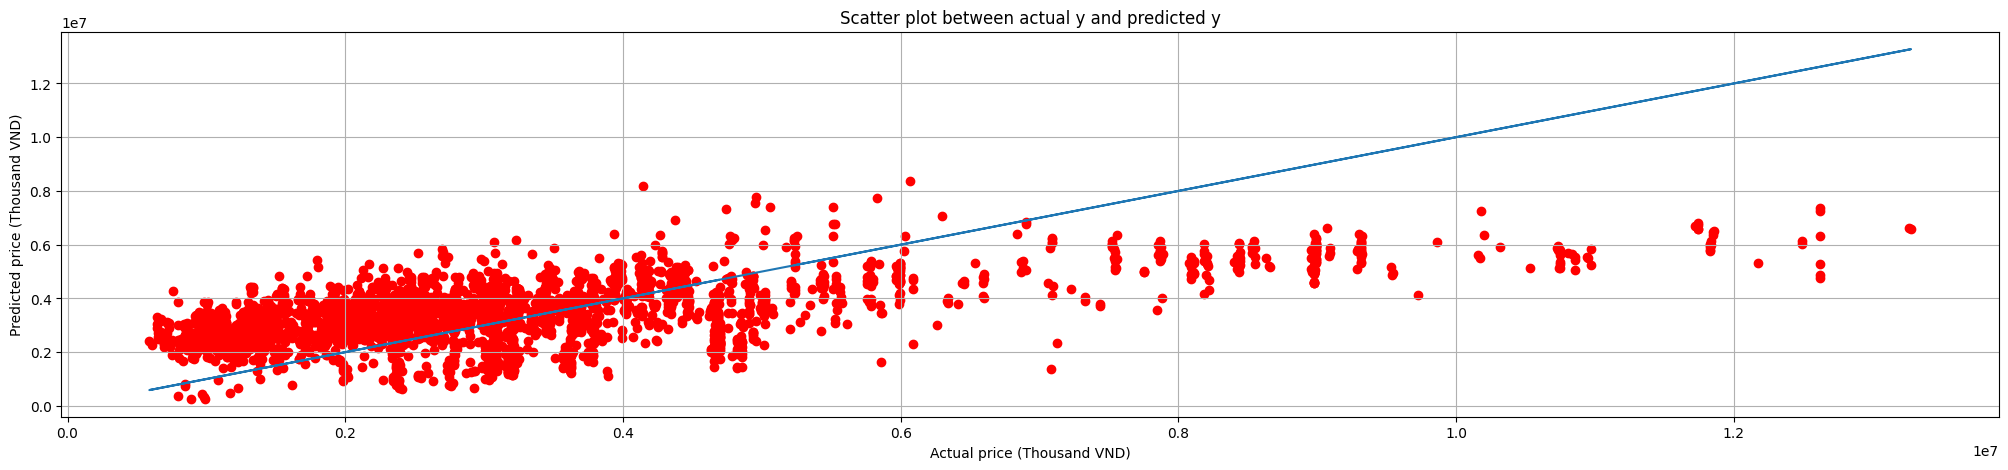

In [31]:
if isinstance(y_train, (pd.Series, pd.DataFrame)):
    y_train = y_train.values.reshape(-1, 1)
    y_val = y_val.values.reshape(-1, 1)
elif y_train.ndim == 1:
    y_train = y_train.reshape(-1, 1)
    y_val = y_val.reshape(-1, 1)
linear_reg = ModelLinearRegression()
linear_reg.train(X_train_scaled, y_train)

linear_y_pred = linear_reg.predict(X_val_scaled)

# Đánh giá mô hình
linear_score_mae, linear_score_rmse, linear_score_mape, linear_r2 = linear_reg.evaluate(y_val, linear_y_pred)

# In kết quả
print("MAE:", linear_score_mae)
print("RMSE:", linear_score_rmse)
print("MAPE:", linear_score_mape)
print("R2:", linear_r2)

# Vẽ biểu đồ
linear_reg.plot_yy(25, 5, linear_y_pred, y_val)

Best Linear Regression Parameters: {'fit_intercept': True}
Validation MAE: 1363163.1687801823
Validation RMSE: 1703267.7618154322
Validation MAPE: 0.5458410380320438
Validation R2: 0.34626635268345607


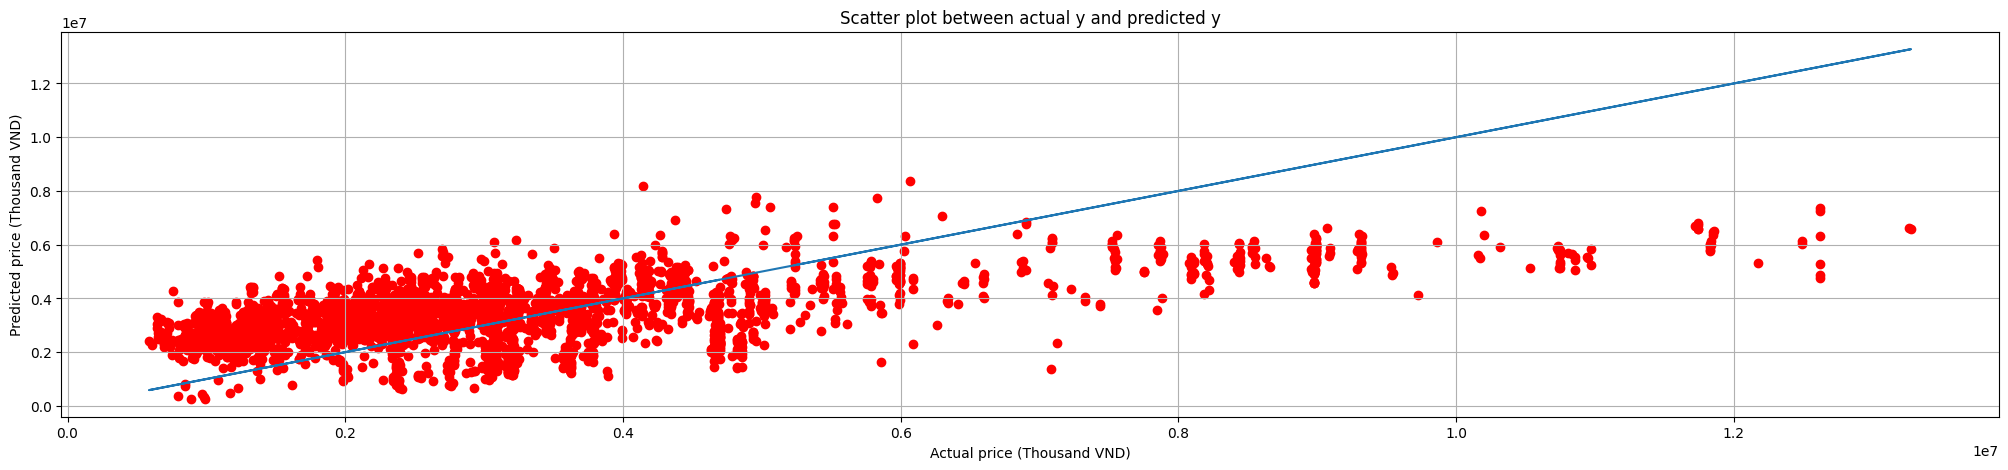

In [49]:
# Define the parameter grid for Linear Regression
param_grid = {'fit_intercept': [True, False]}

# Initialize Linear Regression model
linear_model = LinearRegression()

# Perform GridSearchCV to find the best hyperparameters
grid_search = GridSearchCV(estimator=linear_model, param_grid=param_grid, scoring='neg_mean_squared_error', cv=5)
grid_search.fit(X_train_scaled, y_train)

# Get the best model and its parameters
best_linear_model = grid_search.best_estimator_
best_params = grid_search.best_params_

# Evaluate the best model on the validation set
y_val_pred = best_linear_model.predict(X_val_scaled)
mae = mean_absolute_error(y_val, y_val_pred)
rmse = np.sqrt(mean_squared_error(y_val, y_val_pred))
mape = mean_absolute_percentage_error(y_val, y_val_pred)
r2 = r2_score(y_val, y_val_pred)

# Print the results
print("Best Linear Regression Parameters:", best_params)
print("Validation MAE:", mae)
print("Validation RMSE:", rmse)
print("Validation MAPE:", mape)
print("Validation R2:", r2)

linear_reg.plot_yy(25, 5, y_val_pred, y_val)

In [51]:
from sklearn.linear_model import Ridge, Lasso, ElasticNet

# Define a function to evaluate models with regularization
def evaluate_regularization_models(X_train, X_val, y_train, y_val):
    models = {
        "Lasso": Lasso(alpha=0.01),
        "ElasticNet": ElasticNet(alpha=0.01, l1_ratio=0.5)
    }
    results = []

    for name, model in models.items():
        model.fit(X_train, y_train)
        y_pred = model.predict(X_val)
        mae = mean_absolute_error(y_val, y_pred)
        rmse = np.sqrt(mean_squared_error(y_val, y_pred))
        mape = mean_absolute_percentage_error(y_val, y_pred)
        r2 = r2_score(y_val, y_pred)
        results.append({"Model": name, "MAE": mae, "RMSE": rmse, "MAPE": mape, "R2": r2})

    return pd.DataFrame(results)

# Evaluate the models
regularization_results = evaluate_regularization_models(X_train_scaled, X_val_scaled, y_train, y_val)

# Display the results
print(regularization_results)

        Model           MAE          RMSE      MAPE        R2
0       Lasso  1.363163e+06  1.703268e+06  0.545841  0.346266
1  ElasticNet  1.363340e+06  1.703955e+06  0.546228  0.345739


Model: LinearRegression()


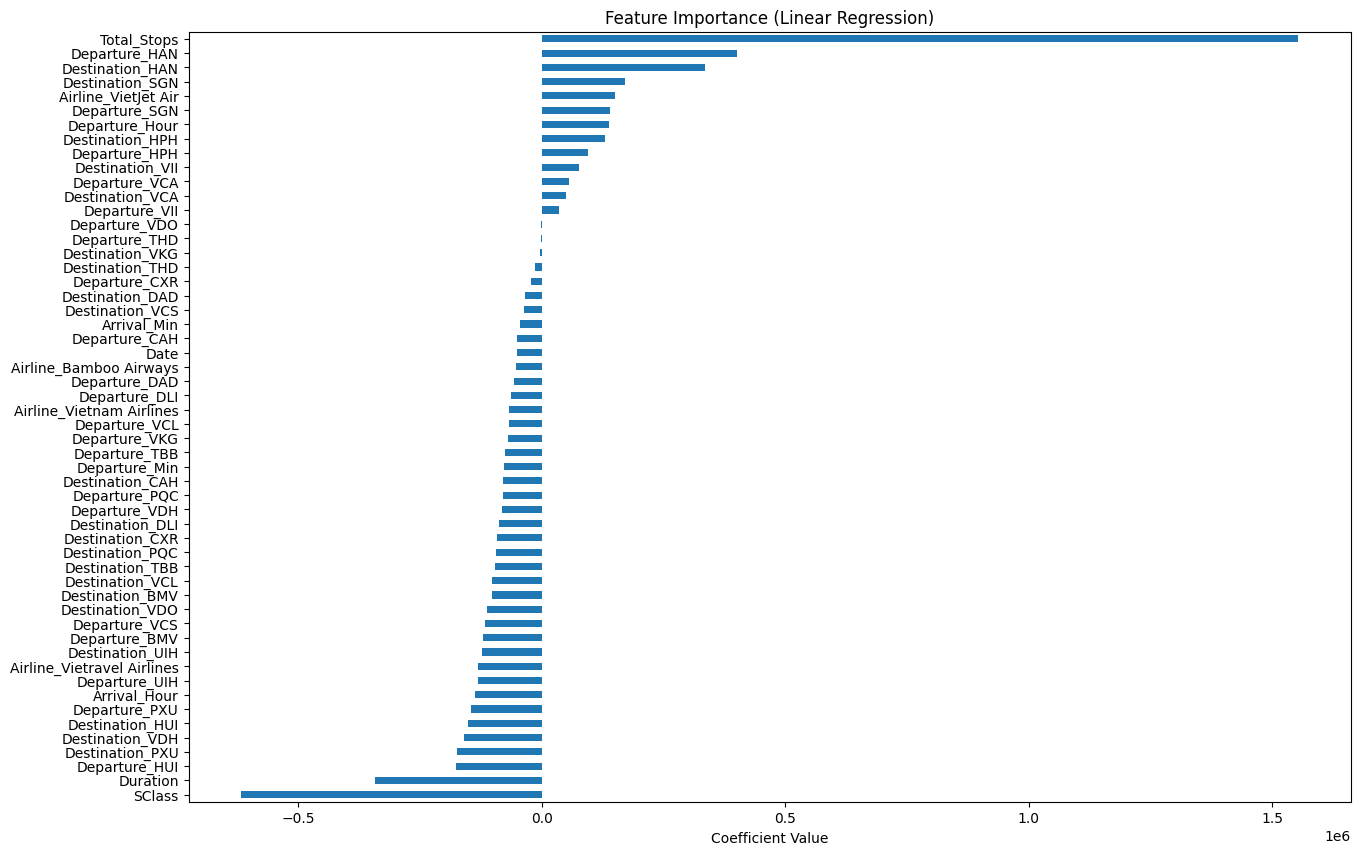

In [36]:
def feature_importance_linear(ml_model, feature_names):
    print('Model: {}'.format(ml_model))
    model = ml_model.fit(X_train_scaled, y_train)
    plt.figure(figsize=(15, 10))
    feat_importances = pd.Series(model.coef_.flatten(), index=feature_names).sort_values(ascending=True)
    feat_importances.plot(kind='barh')
    plt.xlabel("Coefficient Value")
    plt.title("Feature Importance (Linear Regression)")
    plt.show()

# Call the updated function with LinearRegression
ln_model = LinearRegression()
feature_importance_linear(ln_model, X_train.columns)

In [45]:
# Select the desired columns from the original DataFrame before scaling
selected_features = ['SClass', 'Duration', 'Total_Stops']
X_train_selected = X_train[selected_features]
X_val_selected = X_val[selected_features]

Iteration 0: Cost = 7835838636499.442, w = [34298.10848459 28808.57450401 17571.65682616 19185.59476572]
Iteration 100: Cost = 2565165000099.9453, w = [1474058.187903    801744.85720513  642562.47078853  805736.50399764]
Iteration 200: Cost = 2316549745657.5654, w = [1871864.44731022  572014.0667956   646942.8819039   970652.6971776 ]
Iteration 300: Cost = 2164555733962.5552, w = [2153929.51582386  326892.19598532  576467.24132351 1054114.2814808 ]
Iteration 400: Cost = 2054705671202.292, w = [2394045.15843121  123679.84579411  491424.14824249 1113216.85034215]
Iteration 500: Cost = 1973746266297.7598, w = [2601196.78223297  -44535.21827662  405311.79422757 1160471.77582398]
Iteration 600: Cost = 1913601864576.3384, w = [2779551.04905553 -185505.03795919  323203.45378209 1201100.52638   ]
Iteration 700: Cost = 1868733950961.7703, w = [2932750.89419667 -304715.06764819  247081.23012871 1237744.87909315]
Iteration 800: Cost = 1835160638534.0667, w = [3064109.12967207 -406100.49593604  17

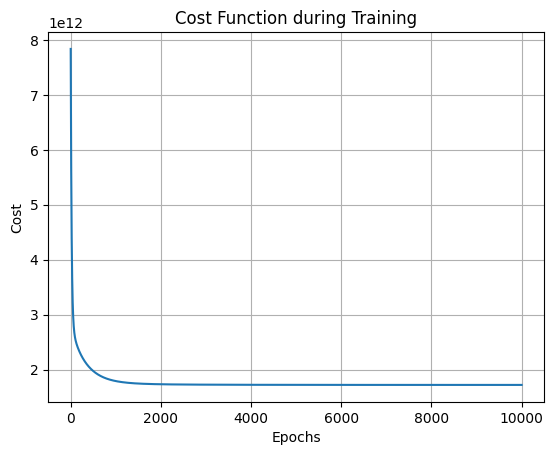

MAE: 1495479.2561505218
RMSE: 1860426.4001146439
MAPE: 0.5943300100175635
R2: 0.22006219335300492


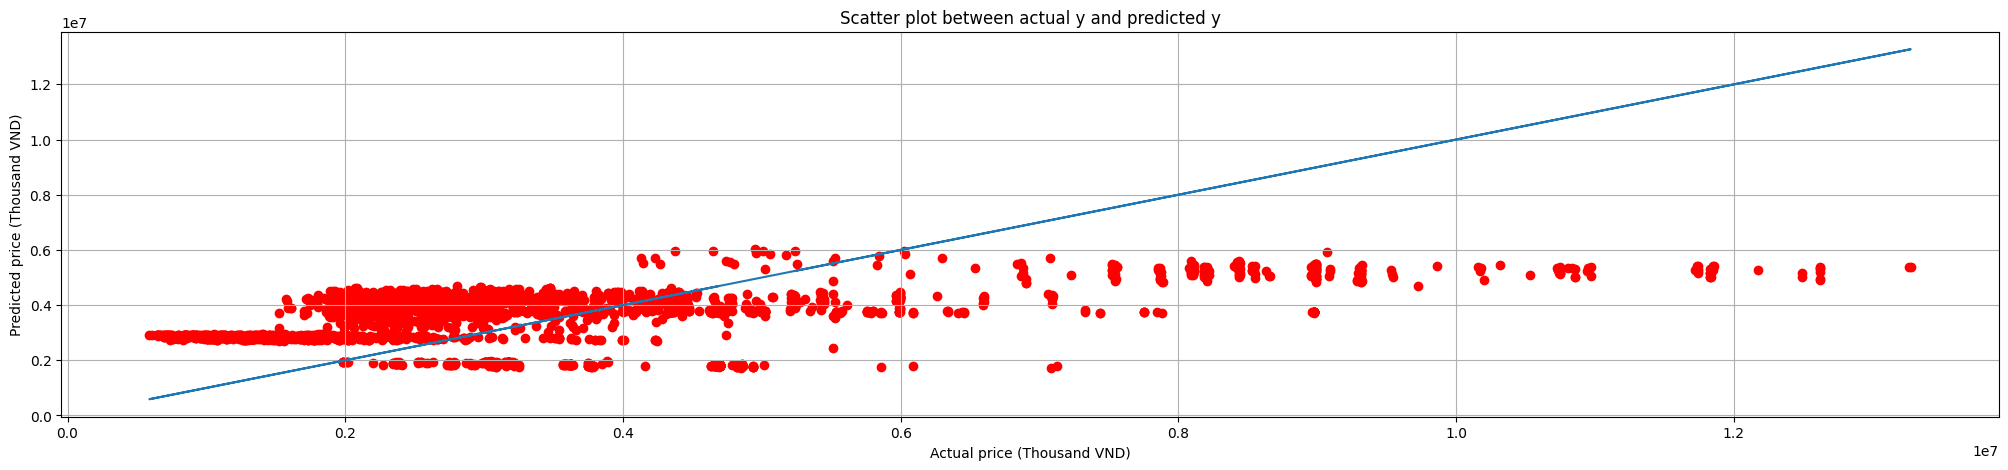

In [46]:
linear_reg_s = ModelLinearRegression()
linear_reg_s.train(X_train_selected, y_train)
linear_y_pred_s = linear_reg_s.predict(X_val_selected)

# Đánh giá mô hình
linear_score_mae, linear_score_rmse, linear_score_mape, linear_r2 = linear_reg_s.evaluate(y_val, linear_y_pred_s)

# In kết quả
print("MAE:", linear_score_mae)
print("RMSE:", linear_score_rmse)
print("MAPE:", linear_score_mape)
print("R2:", linear_r2)

# Vẽ biểu đồ
linear_reg.plot_yy(25, 5, linear_y_pred_s, y_val)

## Triển khai mô hình trên Test data

In [ ]:
testset = pd.read_csv('../clean_data/BigDS_test.csv')
X_test = testset.drop(["Price"] , axis=1)
y_test = testset["Price"]
# selected_features = ['SClass', 'Duration', 'Total_Stops']
# X_test_rf = X_test[selected_features]
# y_test_rf = testset["Price"]
# X_test_rf = X_test_rf.reset_index(drop=True)
# y_test_rf = y_test.reset_index(drop=True)

In [21]:
X_test_rf

,SClass,Duration,Total_Stops
0,1,0.952381,1
1,2,-0.190476,0
2,0,1.063492,1
3,1,-0.158730,0
4,2,-0.047619,0
...,...,...,...
2534,1,-0.063492,0
2535,1,1.158730,1
2536,0,0.793651,1
2537,1,0.857143,1


### Default model

Test MAE: 4748129.8269938985
Test RMSE: 5299701.591839316
Test MAPE: 1.5555713037412724
Test R2: -5.362105781793116


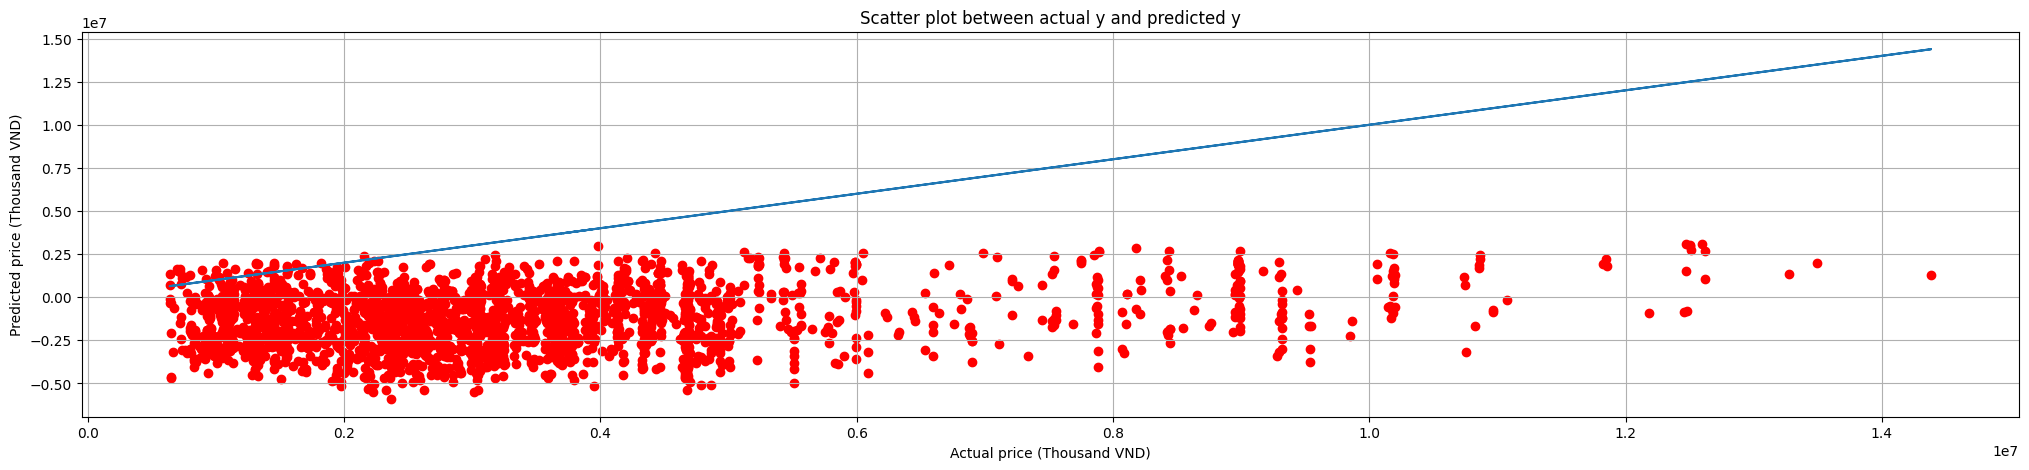

In [56]:
# Perform inference on the test data
y_test_pred = linear_reg.predict(X_test.values)

# Evaluate the model on the test data
test_mae, test_rmse, test_mape, test_r2 = linear_reg.evaluate(y_test_rf.values, y_test_pred)

# Print the evaluation metrics
print("Test MAE:", test_mae)
print("Test RMSE:", test_rmse)

print("Test MAPE:", test_mape)
print("Test R2:", test_r2)

# Plot the actual vs predicted values
linear_reg.plot_yy(25, 5, y_test_pred, y_test_rf.values)

Test MAE (selected features): 1442161.497990046
Test RMSE (selected features): 1864221.7366765654
Test MAPE (selected features): 0.6659113534854626
Test R2 (selected features): 0.21278531406860524


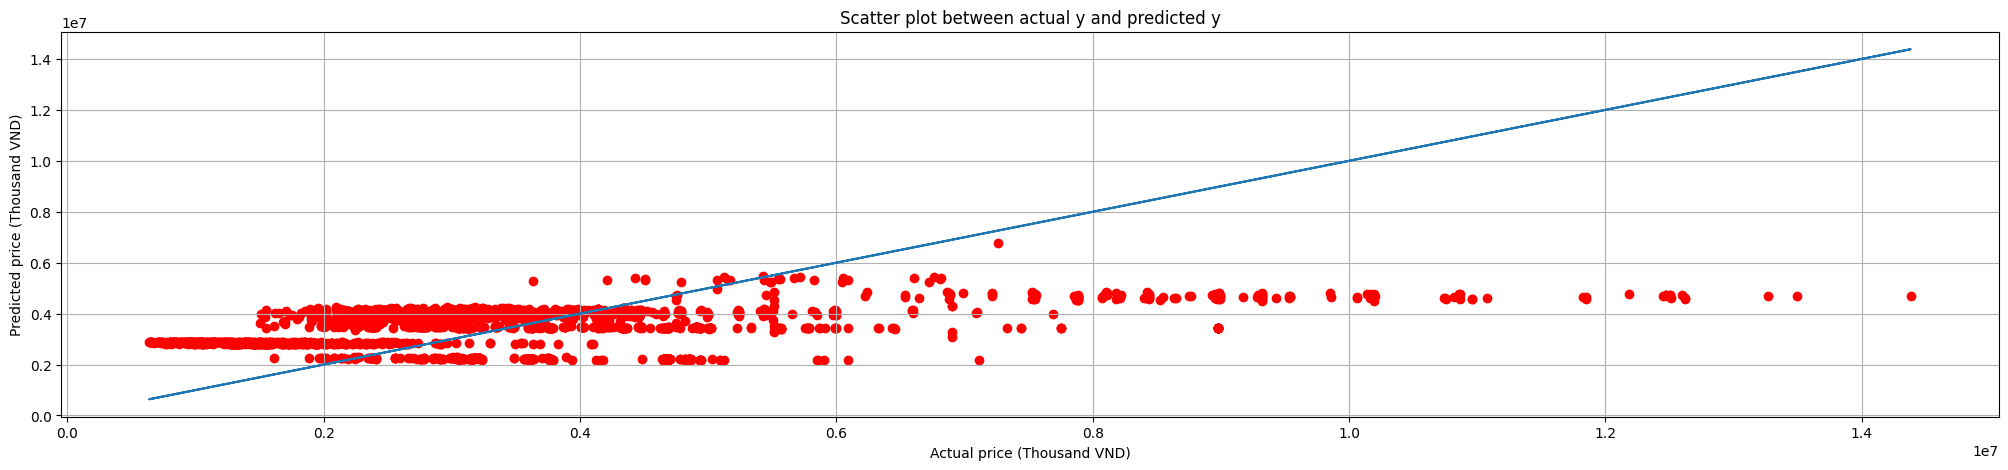

In [58]:
# Select the features for inference
X_test_selected = X_test[selected_features]

# Align the selected features with the training feature set by adding missing columns with zeros
X_test_aligned = pd.DataFrame(0, index=X_test.index, columns=X_train.columns)
X_test_aligned[selected_features] = X_test_selected

# Perform inference on the test data using the aligned features
y_test_pred_selected = linear_reg.predict(X_test_aligned.values)

# Evaluate the model on the test data with selected features
test_mae_selected, test_rmse_selected, test_mape_selected, test_r2_selected = linear_reg.evaluate(y_test_rf.values, y_test_pred_selected)

# Print the evaluation metrics
print("Test MAE (selected features):", test_mae_selected)
print("Test RMSE (selected features):", test_rmse_selected)
print("Test MAPE (selected features):", test_mape_selected)
print("Test R2 (selected features):", test_r2_selected)

# Plot the actual vs predicted values
linear_reg.plot_yy(25, 5, y_test_pred_selected, y_test_rf.values)